Calculating Intra and inter: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1426748/1426748 [00:03<00:00, 445728.86it/s]


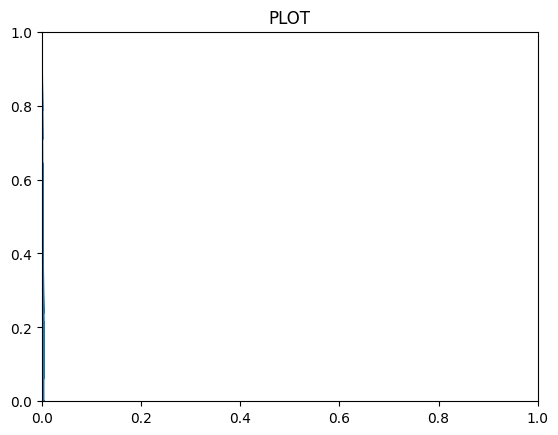

In [4]:
all = open('all.txt', 'r')


class Comparison:
    def __init__(self, user1, image1, user2, image2, score):
        self.user1 = user1;
        self.user2 = user2;
        self.image1 = image1;
        self.image2 = image2;
        self.score = score


def getExtract(line):
    a, b, score, d = line.strip().split(" ")
    _, __, u1, i1 = a.split("_")
    _, __, u2, i2 = b.split("_")
    return Comparison(int(u1), int(i1.split('.')[0]), int(u2), int(i2.split('.')[0]), float(score))



import tqdm

arranged = list(getExtract(x) for x in tqdm.tqdm(all.readlines(),total=1426748,desc="Loading Scores...."))

intra={}
inter={}
minScore = float('inf')
maxScore = float('-inf')
for comparison in tqdm.tqdm(arranged,desc= "Calculating Intra and inter"):
    if not (0.2<=comparison.score<=0.8):
        continue
    if comparison.score:
        minScore = min(minScore,comparison.score)
    maxScore = max(maxScore,comparison.score)
    if comparison.user1==comparison.user2:
        if comparison.user1 not in intra:
            intra[comparison.user1] = []
        intra[comparison.user1].append(comparison.score)
    else:
        user1 = comparison.user1
        user2 = comparison.user2
        score = comparison.score
        if user1 not in inter:
            inter[user1] = {}
        if user2 not in inter:
            inter[user2] = {}
        if user2 not in inter[user1]:
            inter[user1][user2] = []
        if user1 not in inter[user2]:
            inter[user2][user1] = []
        inter[user1][user2].append(score)
        inter[user2][user1].append(score)

users = list(range(0,60))
p = (maxScore - minScore)/(len(users) - 1)

FARs = []
FRRs = []
for i,user in enumerate(users):
  genuine = intra[user]
  imposter = list(y for x in inter[user].values() for y in x )
  threshold = minScore + i * p
  frr = 0
  for score in genuine:
    if score < threshold:
      frr += 1
  frr = frr / len(genuine)

  far = 0
  for score in genuine:
    if score >= threshold:
      far += 1
  far = far / len(imposter)

  FARs.append(far)
  FRRs.append(frr)


import matplotlib.pyplot as plt

plt.plot(FARs,FRRs)
plt.title("PLOT")
plt.axis([0,1,0,1])
plt.show()